# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
    # Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#building query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f'{url}&appid={api_key}&units={units}&q='

In [4]:
#creating lists with city weather data
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_list = []
lat_list = []
lng_list = []
country_list = []
date_time_list = []
count = 0

for city in cities:
    
    count += 1
    print(f'City number: {count}. City name: {city}')
    
    try:
        response = requests.get(query_url + city).json()
        temperature.append((response['main']['temp']))
        humidity.append((response['main']['humidity']))
        cloudiness.append((response['clouds']['all']))
        wind_speed.append((response['wind']['speed']))
        lat_list.append((response['coord']['lat']))
        lng_list.append((response['coord']['lon']))
        city_list.append(city)
        country_list.append(response['sys']['country'])
        date_time_list.append(response['dt'])
        
    except:
        print('City not found.')
        
    time.sleep(1)

City number: 1. City name: souillac
City number: 2. City name: sao filipe
City number: 3. City name: jamestown
City number: 4. City name: kapaa
City number: 5. City name: vila velha
City number: 6. City name: saint-augustin
City number: 7. City name: lobau
City number: 8. City name: mataura
City number: 9. City name: codrington
City number: 10. City name: butaritari
City number: 11. City name: ayorou
City number: 12. City name: haikou
City number: 13. City name: paranhos
City number: 14. City name: rikitea
City number: 15. City name: luderitz
City number: 16. City name: qaanaaq
City number: 17. City name: atuona
City number: 18. City name: port macquarie
City number: 19. City name: bredasdorp
City number: 20. City name: dikson
City number: 21. City name: punta arenas
City number: 22. City name: hamada
City number: 23. City name: isangel
City number: 24. City name: nyzhni sirohozy
City number: 25. City name: benjamin hill
City number: 26. City name: chanute
City number: 27. City name: u

City number: 212. City name: the valley
City number: 213. City name: wangqing
City number: 214. City name: ahuimanu
City number: 215. City name: sakakah
City number: 216. City name: salalah
City number: 217. City name: paragominas
City number: 218. City name: komsomolskiy
City number: 219. City name: mayya
City number: 220. City name: antequera
City number: 221. City name: fairbanks
City number: 222. City name: kermanshah
City number: 223. City name: san cristobal
City number: 224. City name: qianguo
City number: 225. City name: solnechnyy
City number: 226. City name: lebu
City number: 227. City name: ilulissat
City number: 228. City name: monrovia
City number: 229. City name: kununurra
City number: 230. City name: lev tolstoy
City number: 231. City name: toucheng
City number: 232. City name: paamiut
City number: 233. City name: kirakira
City number: 234. City name: znamenskoye
City number: 235. City name: wigston
City number: 236. City name: dawson creek
City number: 237. City name: p

City number: 420. City name: mananjary
City number: 421. City name: chunoyar
City number: 422. City name: bandarbeyla
City number: 423. City name: rurrenabaque
City number: 424. City name: sarkand
City number: 425. City name: gararu
City number: 426. City name: yerofey pavlovich
City number: 427. City name: beringovskiy
City number: 428. City name: praia da vitoria
City number: 429. City name: lompoc
City number: 430. City name: yerbogachen
City number: 431. City name: port augusta
City number: 432. City name: lazaro cardenas
City number: 433. City name: ozgon
City not found.
City number: 434. City name: ancud
City number: 435. City name: portobelo
City number: 436. City name: kaduqli
City number: 437. City name: saldanha
City number: 438. City name: sao miguel do araguaia
City number: 439. City name: tvoroyri
City number: 440. City name: ewa beach
City number: 441. City name: palabuhanratu
City not found.
City number: 442. City name: odessa
City number: 443. City name: coquimbo
City n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
#converting UTC time to date
import datetime

time_list = []

for row in range(0, len(weather_data)):
    time = weather_data['Date Time UTC'][row]
    time = datetime.date.fromtimestamp(time)
    
    time_list.append(time)
    

In [87]:
#create df from city weather query results
weather_dict = {"City": city_list,
               "Temperature": temperature,
               "%Humidity": humidity,
               "Cloudiness":cloudiness,
               "Wind Speed": wind_speed,
               "Latitude": lat_list,
               "Longitude": lng_list,
               "Country": country_list,
               "Date Time UTC": date_time_list,
               "Date": time}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Temperature,%Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Country,Date Time UTC,Date
0,souillac,20.21,64,40,8.23,-20.5167,57.5167,MU,1660243000,2022-08-11
1,sao filipe,26.43,72,5,5.16,14.8961,-24.4956,CV,1660243001,2022-08-11
2,jamestown,23.67,47,40,5.66,42.0970,-79.2353,US,1660242879,2022-08-11
3,kapaa,26.19,76,40,7.72,22.0752,-159.3190,US,1660243004,2022-08-11
4,vila velha,23.86,60,0,7.72,-20.3297,-40.2925,BR,1660243005,2022-08-11


In [88]:
#export city data to csv
weather_data.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [89]:
#there are no cities in this df with humidity > 100%
weather_data.loc[weather_data['%Humidity'] > 100]

,City,Temperature,%Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Country,Date Time UTC,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [90]:
weather_data.head()

,City,Temperature,%Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Country,Date Time UTC,Date
0,souillac,20.21,64,40,8.23,-20.5167,57.5167,MU,1660243000,2022-08-11
1,sao filipe,26.43,72,5,5.16,14.8961,-24.4956,CV,1660243001,2022-08-11
2,jamestown,23.67,47,40,5.66,42.0970,-79.2353,US,1660242879,2022-08-11
3,kapaa,26.19,76,40,7.72,22.0752,-159.3190,US,1660243004,2022-08-11
4,vila velha,23.86,60,0,7.72,-20.3297,-40.2925,BR,1660243005,2022-08-11


In [112]:
chart_date =str(weather_data['Date'][0])

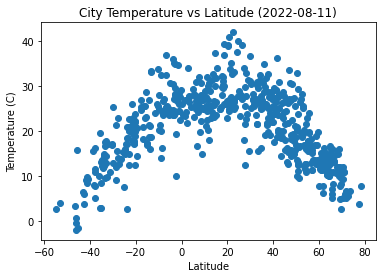

In [115]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title(f'City Temperature vs Latitude ({chart_date})')

plt.show()

Explanation: This plot analyzes the relationship between temperature and latitude for the queried cities. It shows that maximum temperature occurs slighly north of the equator.

## Latitude vs. Humidity Plot

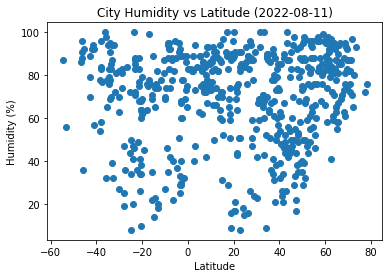

In [116]:
plt.scatter(weather_data['Latitude'], weather_data['%Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Humidity vs Latitude ({chart_date})')

plt.show()

Explanation: This plot analyzes the relationship between humidity and latitude for the queried cities. Percent humidity does not appear to be dependent on latitude.

## Latitude vs. Cloudiness Plot

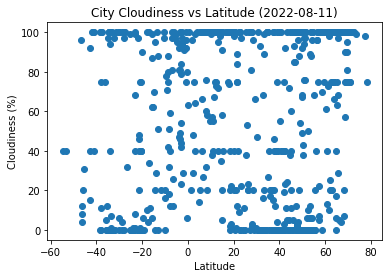

In [117]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Cloudiness vs Latitude ({chart_date})')

plt.show()

Explanation: This plot analyzes the relationship between cloudiness and latitude for the queried cities. Cloudiness does not appear to be dependent on latitude.

## Latitude vs. Wind Speed Plot

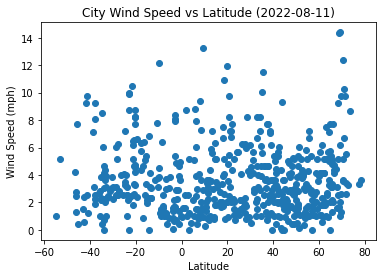

In [118]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Wind Speed vs Latitude ({chart_date})')

plt.show()

Explanation: This plot analyzes the relationship between wind speed and latitude for the queried cities. Wind speed does not appear to be dependent on latitude.

## Linear Regression

In [119]:
#Creating dataframes for each hemisphere
north_data = weather_data.loc[weather_data['Latitude'] > 0]
south_data = weather_data.loc[weather_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

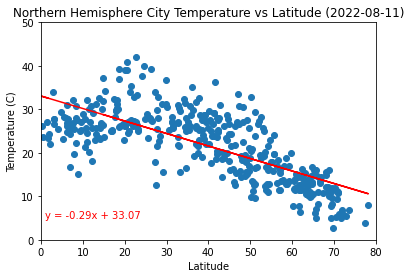

 rsquared = 0.53


In [121]:
plt.scatter(north_data['Latitude'], north_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title(f'Northern Hemisphere City Temperature vs Latitude ({chart_date})')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Temperature'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(1,5), color='red', fontsize=10)

plt.xlim(0, 80)
plt.ylim(0, 50)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

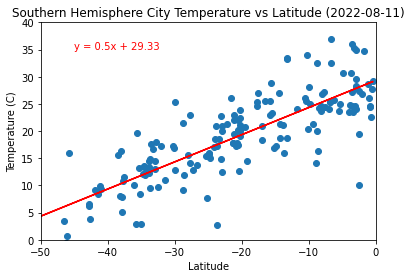

 rsquared = 0.67


In [122]:
plt.scatter(south_data['Latitude'], south_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title(f'Southern Hemisphere City Temperature vs Latitude ({chart_date})')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Temperature'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-45,35), color='red', fontsize=10)

plt.xlim(-50, 0)
plt.ylim(0, 40)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

The linear regressions are modeling the dependence of temperature on latitude for both the Northern and Southern Hemisphere. The plots show that in the North Hemisphere, temperature decreases as latitude increases. In the Southern Hemisphere, temperature increases as latitude increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

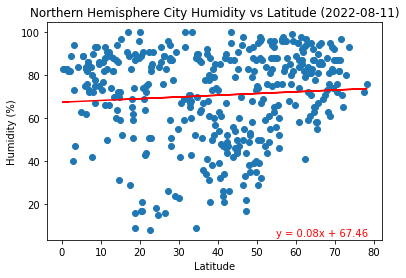

 rsquared = 0.01


In [123]:
plt.scatter(north_data['Latitude'], north_data['%Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere City Humidity vs Latitude ({chart_date})')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['%Humidity'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(55,5), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

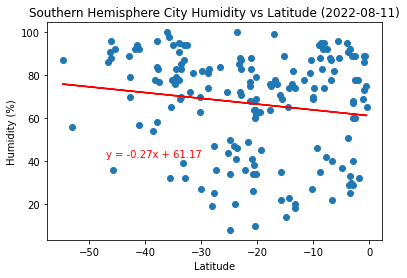

 rsquared = 0.02


In [131]:
plt.scatter(south_data['Latitude'], south_data['%Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere City Humidity vs Latitude ({chart_date})')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['%Humidity'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-47,42), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

The linear regressions are modeling the dependence of humidity on latitude for both the Northern and Southern Hemispheres. The low r squared values provide evidence supporting the claim that humidity is not dependent on latitude for either hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

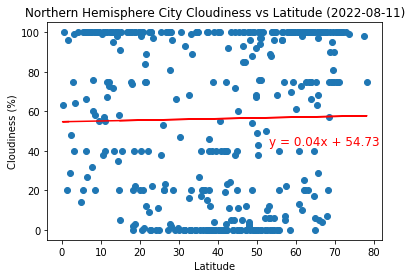

 rsquared = 0.0


In [128]:
plt.scatter(north_data['Latitude'], north_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere City Cloudiness vs Latitude ({chart_date})')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Cloudiness'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(53,43), color='red', fontsize=12)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

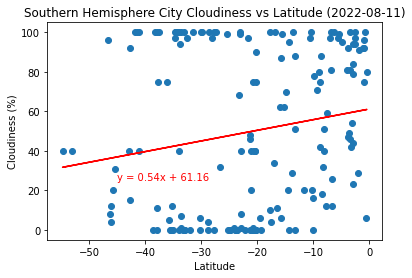

 rsquared = 0.03


In [132]:
plt.scatter(south_data['Latitude'], south_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere City Cloudiness vs Latitude ({chart_date})')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Cloudiness'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-45,25
                     ), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

The linear regressions are modeling the dependence of cloudiness on latitude for both the Northern and Southern Hemispheres. The low r squared values provide evidence supporting the claim that cloudiness is not dependent on latitude for either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

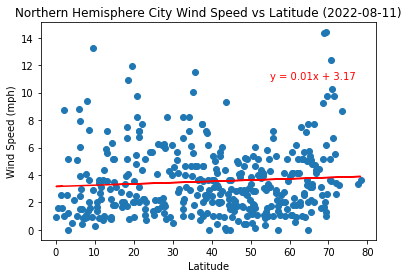

 rsquared = 0.01


In [134]:
plt.scatter(north_data['Latitude'], north_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere City Wind Speed vs Latitude ({chart_date})')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Wind Speed'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(55,11), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

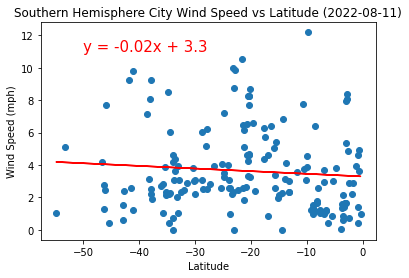

 rsquared = 0.01


In [137]:
plt.scatter(south_data['Latitude'], south_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere City Wind Speed vs Latitude ({chart_date})')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Wind Speed'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-50,11), color='red', fontsize=15)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

The linear regressions are modeling the dependence of wind speed on latitude for both the Northern and Southern Hemispheres. The low r squared values provide evidence supporting the claim that wind speed is not dependent on latitude for either hemisphere.